# Applying a median filter to SeaFlow PAR 

In [1]:
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt

# load data
datafile = 'data/SeaFlow_SizeDist_regrid-15-5.nc'

data_seaflow = {}
with nc4.Dataset(datafile) as nc:
    for var in nc.variables:
        data_seaflow[var] = nc.variables[var][:]

In [2]:
n = len(data_seaflow['PAR'])
par_medianfiltered = {2*wsh+1:np.array([np.median(data_seaflow['PAR'][max(0,i-wsh):min(n,i+wsh+1)]) for i in range(n)]) for wsh in (5,10,20,30,40)}

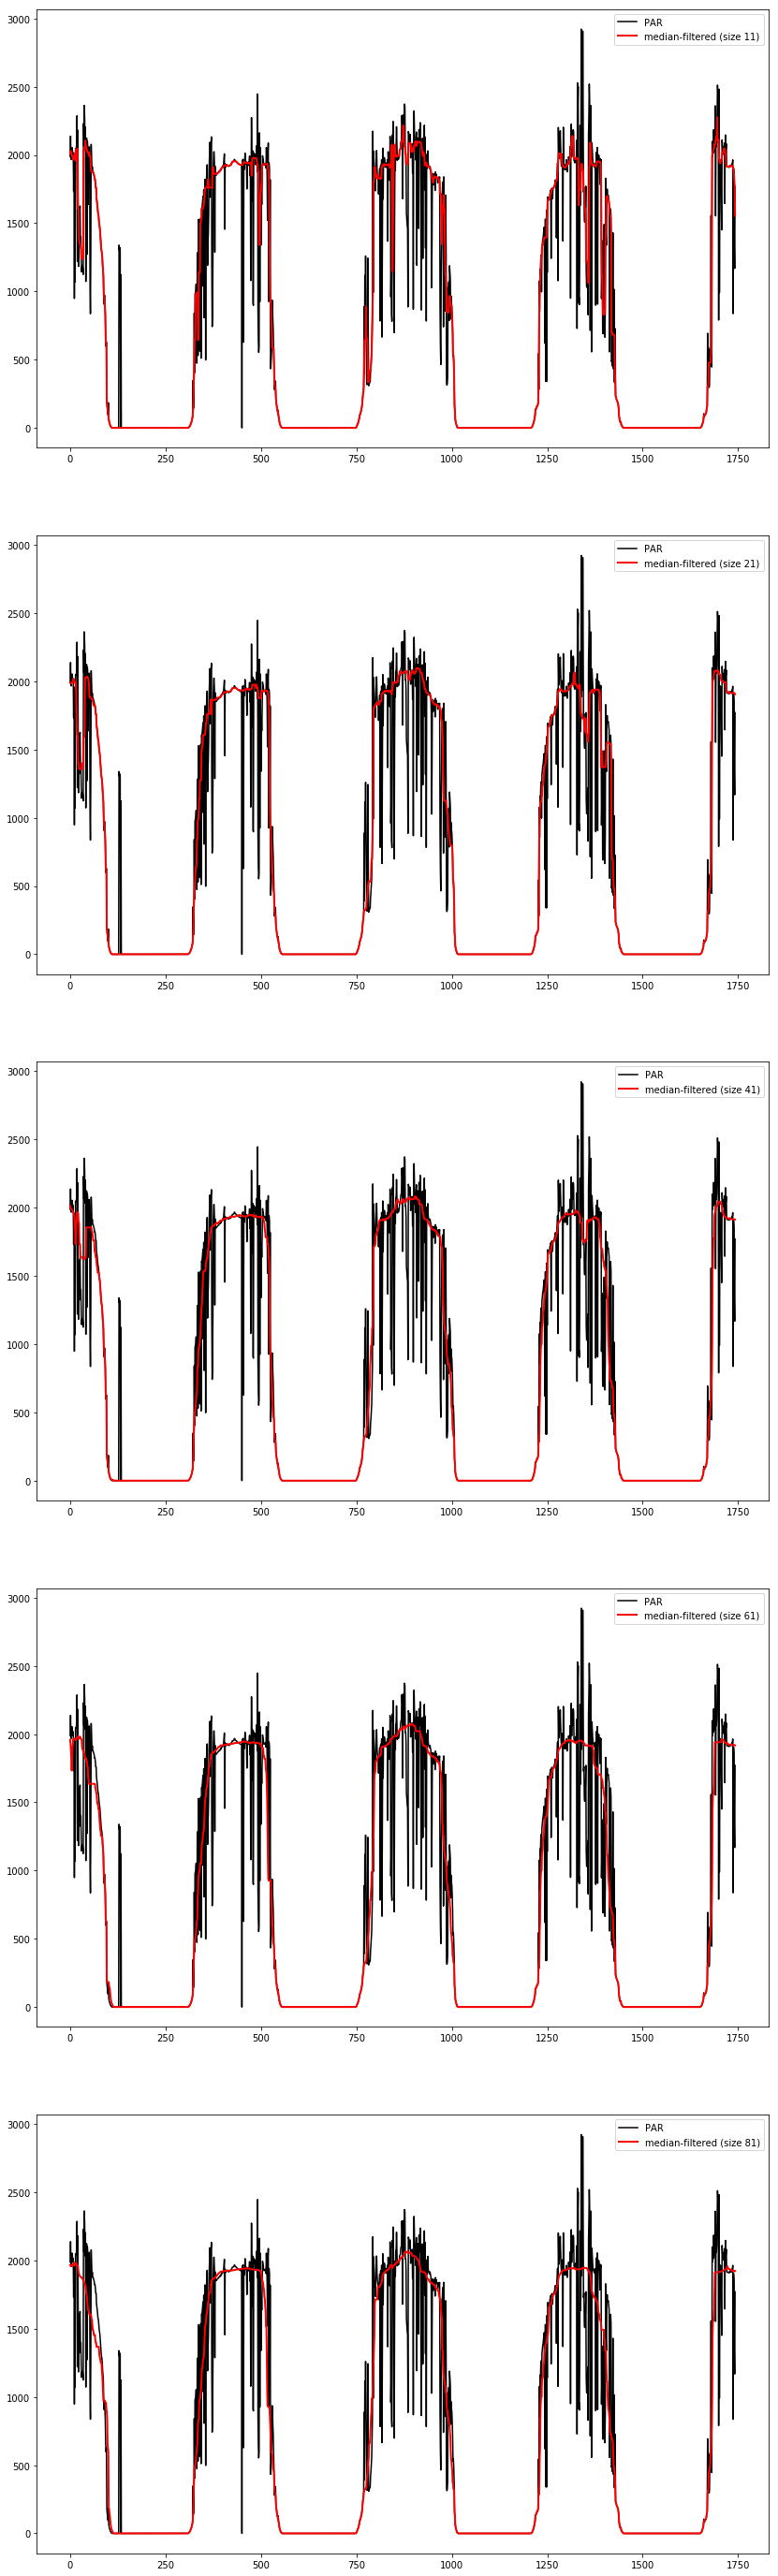

In [3]:
nrows = len(par_medianfiltered)

fig, axs = plt.subplots(nrows=nrows, figsize=(14,nrows*10))
for ax,windowsize in zip(axs.flat,par_medianfiltered):
    ax.plot(data_seaflow['PAR'], color='black', label='PAR')
    ax.plot(par_medianfiltered[windowsize], color='red', lw=2, label='median-filtered (size {})'.format(windowsize))
    ax.legend()